# Data pre-processing

In [1]:
import plotly.express as px
import pandas as pd

In [12]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [21]:
import matplotlib.pyplot as plt

## Flood data

### Floods in Louisiana March 2016
Comes from https://stn.wim.usgs.gov/FEV/#2016MarLAFlood

452 data points

In [28]:
df = pd.read_csv("data/flood-louisiana-mar2016-highwater.csv")

In [29]:
df = df[['latitude', 'longitude']]
df.to_csv("data/preprocessed/flood_coords-mar2016.csv", index=False)
df

,latitude,longitude
0,30.936490,-90.500570
1,30.875300,-90.500470
2,30.876640,-90.492230
3,30.874874,-90.500008
4,30.777570,-90.495560
...,...,...
447,30.740611,-93.638306
448,30.288611,-93.765556
449,30.288611,-93.765556
450,30.122500,-93.714444


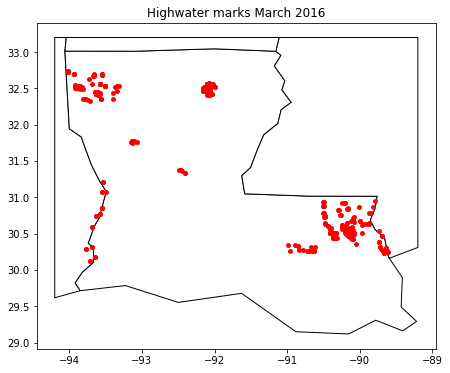

In [30]:
geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file('data/ne_110m_admin_1_states_provinces')
ax = world.clip([-94.2, 25, -89.2, 33.2]).plot(color="white", edgecolor="black",figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=15)
plt.title("Highwater marks March 2016")
plt.show()

### Floods in Louisiana August 2016
Comes from https://stn.wim.usgs.gov/FEV/#2016AugLAFlood

(same data can be found on https://www.usgs.gov/mission-areas/water-resources/science/august-2016-louisiana-floods)

589 data points

In [32]:
df = pd.read_csv("data/flood-louisiana-aug2016-highwater.csv")

In [33]:
df = df[['latitude', 'longitude']]
df.to_csv("data/preprocessed/flood_coords-aug2016.csv", index=False)
df

,latitude,longitude
0,30.28997,-90.86742
1,30.28731,-90.87822
2,30.27283,-90.86233
3,30.27597,-90.87147
4,30.27625,-90.87133
...,...,...
584,30.09265,-91.98055
585,30.09214,-91.98769
586,30.09264,-91.98050
587,30.18149,-92.04788


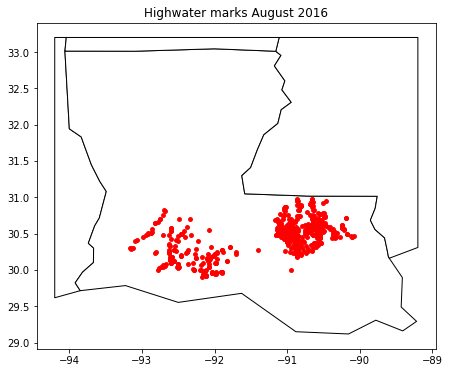

In [34]:
geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file('data/ne_110m_admin_1_states_provinces')
ax = world.clip([-94.2, 25, -89.2, 33.2]).plot(color="white", edgecolor="black",figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=15)
plt.title("Highwater marks August 2016")
plt.show()

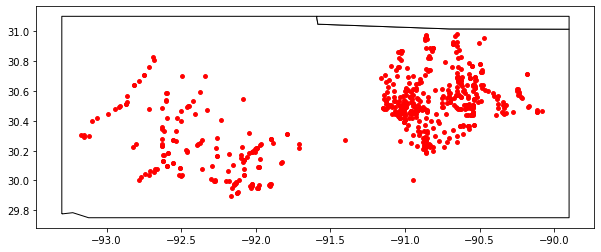

In [35]:
ax = world.clip([-93.3, 29.75, -89.9, 31.1]).plot(color="white", edgecolor="black",figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=15);

In [ ]:
df['Address'] = "hi"
df['Listed'] = 3

In [20]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="Address", 
                        hover_data=["Address", "Listed"],
                        color="Listed",
                        color_continuous_scale=color_scale,
                        size="Listed",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

In [ ]:
lo=df['longitude']
la=df['latitude']

delhi_map = gpd.read_file(r'C:\Users\Desktop\Delhi_Wards.shp')
fig,ax = plt.subplots(figsize = (15,15))
delhi_map.plot(ax = ax)
geometry = [Point(xy) for xy in zip(lo,la)]
geo_df = gpd.GeoDataFrame(geometry = geometry)
print(geo_df)
g = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'Delhi')
plt.show()

In [ ]:

long =[77.2885437011719, 77.231931, 77.198767, 77.2750396728516]
lat = [28.6877899169922, 28.663863, 28.648287, 28.5429172515869]
geometry = [Point(xy) for xy in zip(long,lat)]


#wardlink = "New Folder/wards delimited.shp"

#ward = gpd.read_file(wardlink, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry)

#ward.crs = {'init':"epsg:4326"}
geo_df.crs = {'init':"epsg:4326"}

# plot the polygon
ax = ward.plot(alpha=0.35, color='#d66058', zorder=1)
# plot the boundary only (without fill), just uncomment
#ax = gpd.GeoSeries(ward.to_crs(epsg=3857)['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)
ax = gpd.GeoSeries(ward['geometry'].unary_union).boundary.plot(ax=ax, alpha=0.5, color="#ed2518",zorder=2)

# plot the marker
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'Delhi', zorder=3)

ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [24]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()